In [26]:
import sys
sys.path.append('/home/biswajitsc_google_com/nfs_mount/hierarchicalforecasting/')
import data_loader
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [58]:
with open('../data/m5/data.pkl', 'rb') as fin:
    data = pickle.load(fin)
tree = data[0]
leaves = np.where(tree.leaf_vector.astype(np.bool))[0]
non_leaves = np.where(1-tree.leaf_vector.astype(np.bool))[0]

[0.26306337 0.13400371]


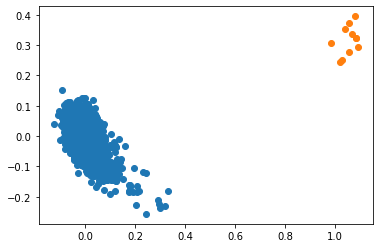

In [76]:
emb = np.load('../logs/m5/fixed/embs/run_1/emb_20.npy')
pca = PCA(n_components=2, svd_solver='full')
emb_2d = pca.fit_transform(emb)
print(pca.explained_variance_ratio_)
plt.scatter(emb_2d[leaves, 0], emb_2d[leaves, 1])
plt.scatter(emb_2d[non_leaves, 0], emb_2d[non_leaves, 1])

(3060, 16)
[0.50626665 0.30807635]


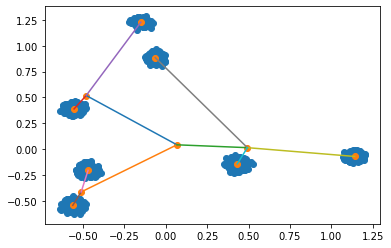

In [79]:
emb = np.load('../logs/m5/fixed_add_dev/embs/run_1/emb_10.npy')
ancestor_matrix = tree.ancestor_matrix
emb = ancestor_matrix @ emb
print(emb.shape)
pca = PCA(n_components=2, svd_solver='full')
emb_2d = pca.fit_transform(emb)
print(pca.explained_variance_ratio_)
plt.scatter(emb_2d[leaves, 0], emb_2d[leaves, 1])
plt.scatter(emb_2d[non_leaves, 0], emb_2d[non_leaves, 1])
num_points = len(non_leaves)
for i in range(num_points):
    for j in range(i+1, num_points):
        ida = non_leaves[i]
        idb = non_leaves[j]
        if tree.adj_matrix[ida, idb]:
            x = [emb_2d[ida, 0], emb_2d[idb, 0]]
            y = [emb_2d[ida, 1], emb_2d[idb, 1]]
            plt.plot(x, y)

In [52]:
x = np.bool([0, 0, 1, 1])
y = np.identity(4)
y[x]

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]])

In [43]:
for i in np.where(1-leaves)[0]:
    print(i)

0
1
2
419
569
570
1103
1619
1620
1837
2236


In [55]:
emb_0 = np.load('../logs/m5/fixed/embs/run_1/emb_0.npy')
emb_1 = np.load('../logs/m5/fixed/embs/run_1/emb_10.npy')
diff = emb_0 - emb_1
norms = np.linalg.norm(diff, axis=1)

(array([  9.,  25.,  57., 169., 387., 656., 856., 641., 221.,  39.]),
 array([-1.1549873 , -1.1201482 , -1.085309  , -1.0504699 , -1.0156307 ,
        -0.98079157, -0.94595236, -0.9111132 , -0.87627405, -0.8414349 ,
        -0.80659574], dtype=float32),
 <a list of 10 Patch objects>)

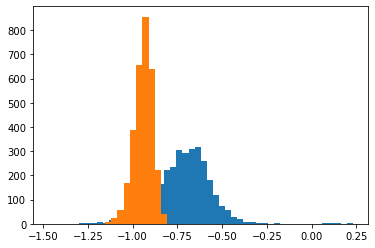

In [56]:
plt.hist(np.log10(norms), bins=50)
plt.hist(np.log10(np.linalg.norm(emb_0, axis=1)))